In [1]:
# Importando bibliotecas
from numpy  import *
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx

In [2]:
df = pd.read_csv('trade_1988_2021.csv')

for year in df['Year'].unique():
    dfyear = df.loc[df['Year'] == year]
    dfyear[['ReporterISO3', 'PartnerISO3']].to_csv(f'Anos/{year}.txt', sep=' ', index=False, header=False)

In [3]:
def failures(H):
    G = H.copy()
    from random import choice
    N0 = len(G)
    vn = []
    S = []
    n = 0 #number of nodes removed
    while(len(G.nodes()) > int(0.01*N0)):
        #print('Removing... n = ', n)
        #print(G.nodes)
        node = random.choice(G.nodes()) #select the node on the largest component
        #print('selected to removed:', node)
        G.remove_node(node) 
        #Gcc=sorted(nx.connected_component_subgraphs(G), key = len, reverse=True)
        Gcc = sorted(nx.connected_components(G), key=len, reverse=True)
        Glc = G.subgraph(Gcc[0])
        S.append(len(Glc)/N0) #store the size of the largest component
        n = n + 1
        vn.append(n/N0)
    return S, vn

def most_connected(G): # This function is used to find the most connected node
    maxk = 0
    node = 0
    for i in G.nodes():
        if(G.degree(i) >= maxk):
            maxk = G.degree(i)
            node = i
    return node 

def attacks(H):
    G = H.copy()
    from random import choice
    N0 = len(G)
    vn = []
    S = []
    n = 0 #number of nodes removed
    while(len(G.nodes()) > int(0.01*N0)):
        #print('Removing... n = ', n)
        #print(G.nodes)
        node = most_connected(G) #select the most connected node on the largest component
        #print('selected to removed:', node)
        G.remove_node(node) 
        Gcc = sorted(nx.connected_components(G), key=len, reverse=True)
        Glc = G.subgraph(Gcc[0])
        S.append(len(Glc)/N0) #store the size of the largest component
        n = n + 1
        vn.append(n/N0)
    return S, vn

def fcritical(G):
    def momment_of_degree_distribution2(G,m):
        M = 0
        N = len(G)
        for i in G.nodes():
            M = M + G.degree(i)**m
        M = M/N
        return M
    f = 1 - 1/(momment_of_degree_distribution2(G,2)/momment_of_degree_distribution2(G,1) - 1)
    return f

### Visão geral
### 1988-2021

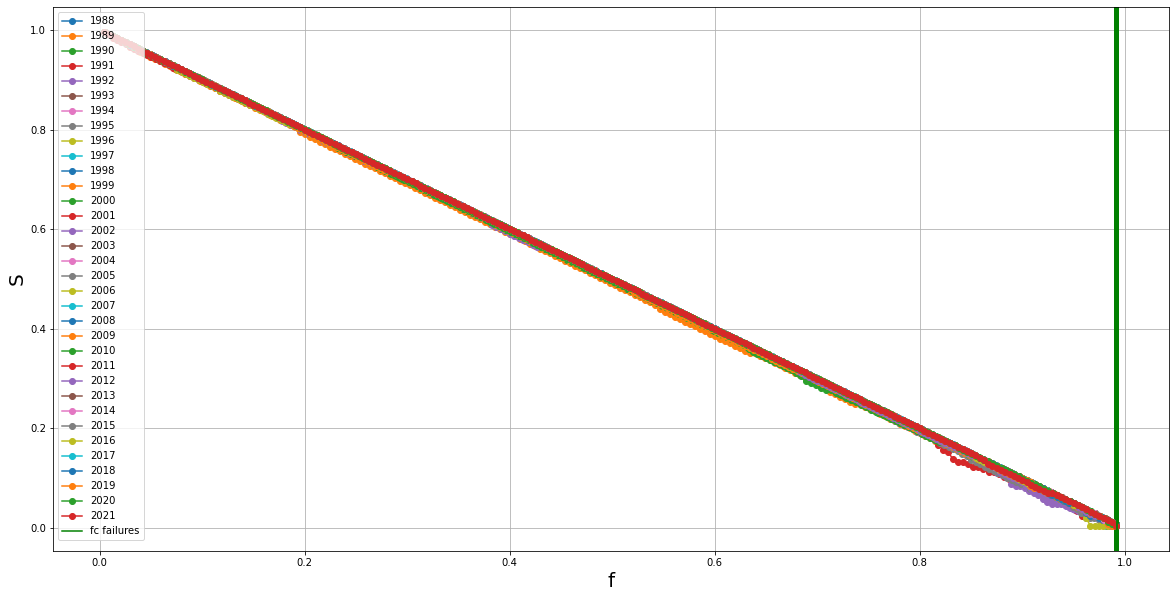

In [4]:
# Robustez a Falhas
plt.figure(figsize=(20,10))

for crisis_year in np.array(sort(df['Year'].unique())):
    Gyear = nx.read_edgelist(f'Anos/{crisis_year}.txt')
    fc = fcritical(Gyear)
    Syear, vnyear = failures(Gyear)
    plt.plot(vnyear,Syear,'-o', label=f'{crisis_year}')
    plt.axvline(x=fc, color = 'g')

plt.axvline(x=fc, color = 'g', label='fc failures')
plt.legend(loc='upper left')
plt.xlabel("f", fontsize=20)
plt.ylabel("S", fontsize=20)
plt.grid(True)
plt.show(); 

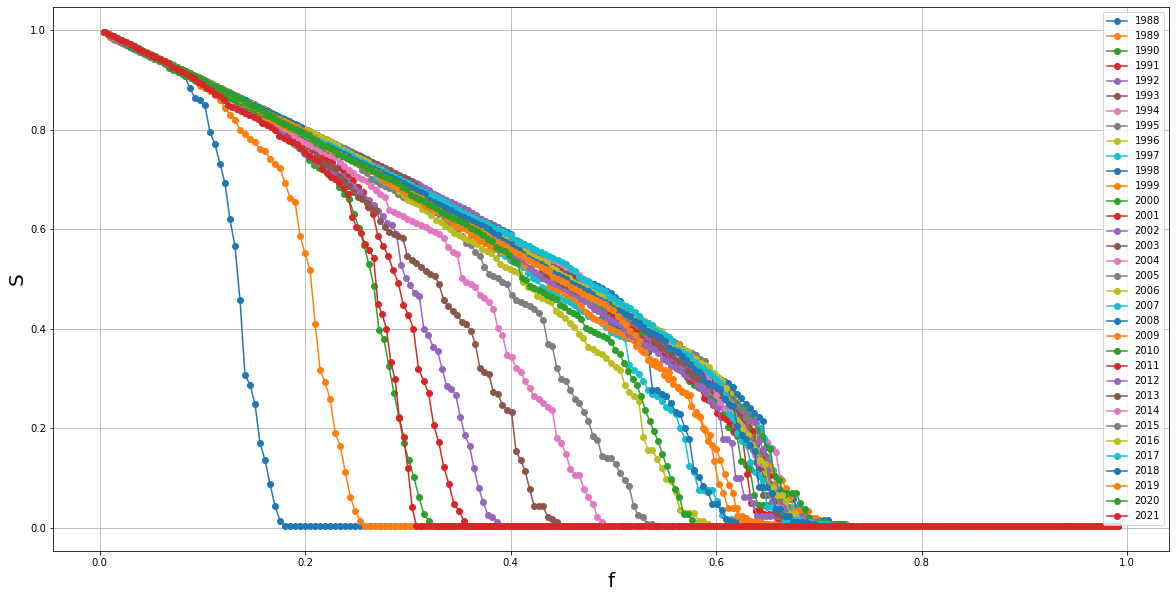

In [5]:
# Robustez a Ataques
plt.figure(figsize=(20,10))

for crisis_year in np.array(sort(df['Year'].unique())):
    Gyear = nx.read_edgelist(f'Anos/{crisis_year}.txt')
    Syear, vnyear = attacks(Gyear)
    plt.plot(vnyear,Syear,'-o', label=f'{crisis_year}')


plt.legend()
plt.xlabel("f", fontsize=20)
plt.ylabel("S", fontsize=20)
plt.grid(True)
plt.show(); 

## Robustez da rede ao longo dos anos
### 1988-1997

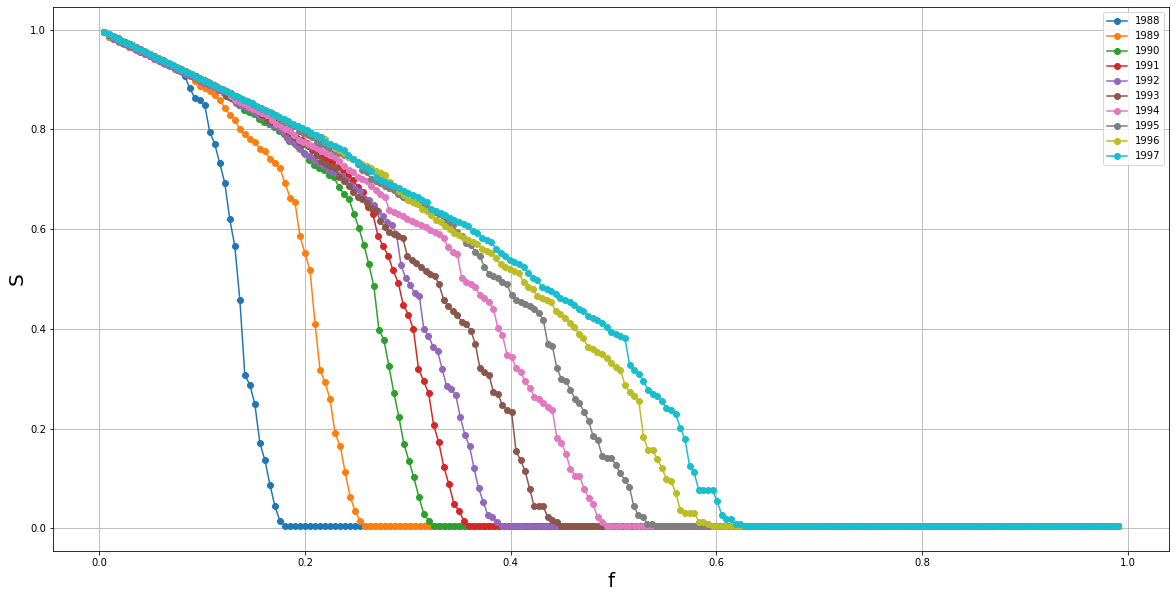

In [6]:
plt.figure(figsize=(20,10))

for crisis_year in np.array([1988,1989,1990,1991,1992,1993,1994,1995,1996,1997]):
    Gyear = nx.read_edgelist(f'Anos/{crisis_year}.txt')
    Syear, vnyear = attacks(Gyear)
    plt.plot(vnyear,Syear,'-o', label=f'{crisis_year}')


plt.legend()
plt.xlabel("f", fontsize=20)
plt.ylabel("S", fontsize=20)
plt.grid(True)
plt.show(); 

### 1998-2007

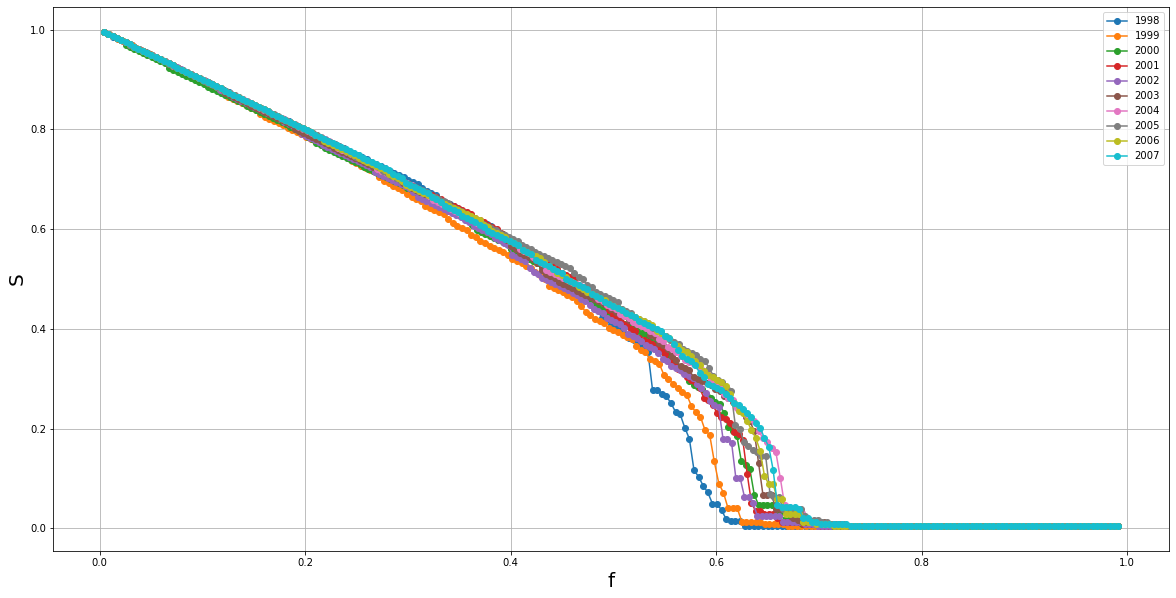

In [7]:
plt.figure(figsize=(20,10))

for crisis_year in np.array([1998,1999,2000,2001,2002,2003,2004,2005,2006,2007]):
    Gyear = nx.read_edgelist(f'Anos/{crisis_year}.txt')
    Syear, vnyear = attacks(Gyear)
    plt.plot(vnyear,Syear,'-o', label=f'{crisis_year}')


plt.legend()
plt.xlabel("f", fontsize=20)
plt.ylabel("S", fontsize=20)
plt.grid(True)
plt.show(); 

### 2008-2013

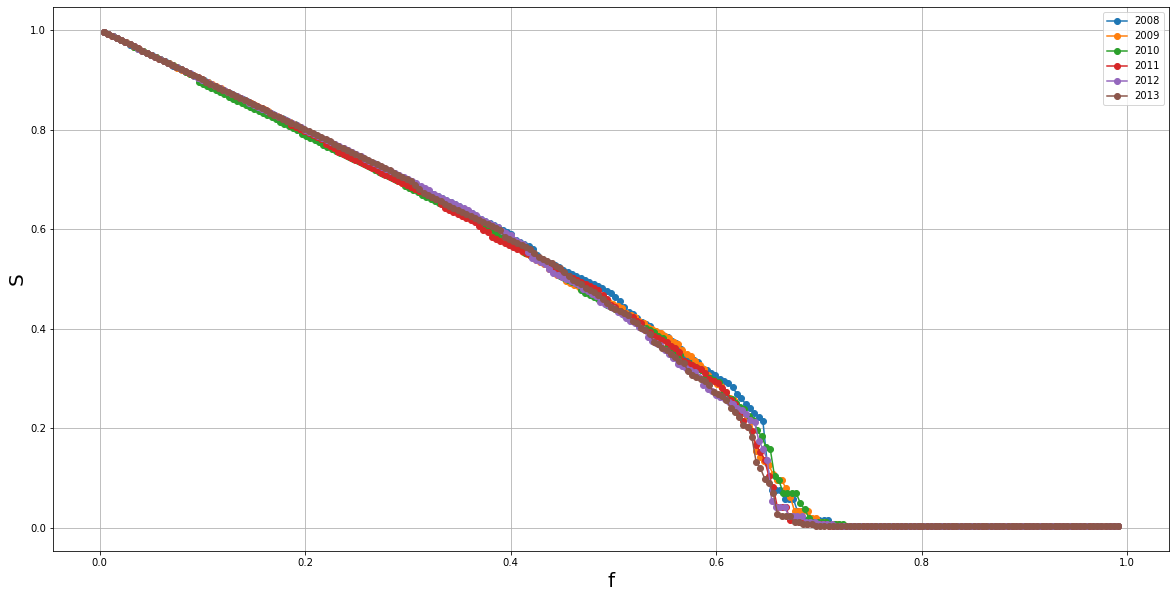

In [8]:
plt.figure(figsize=(20,10))

for crisis_year in np.array([2008,2009,2010,2011,2012,2013]):
    Gyear = nx.read_edgelist(f'Anos/{crisis_year}.txt')
    Syear, vnyear = attacks(Gyear)
    plt.plot(vnyear,Syear,'-o', label=f'{crisis_year}')


plt.legend()
plt.xlabel("f", fontsize=20)
plt.ylabel("S", fontsize=20)
plt.grid(True)
plt.show(); 

### 2014-2021

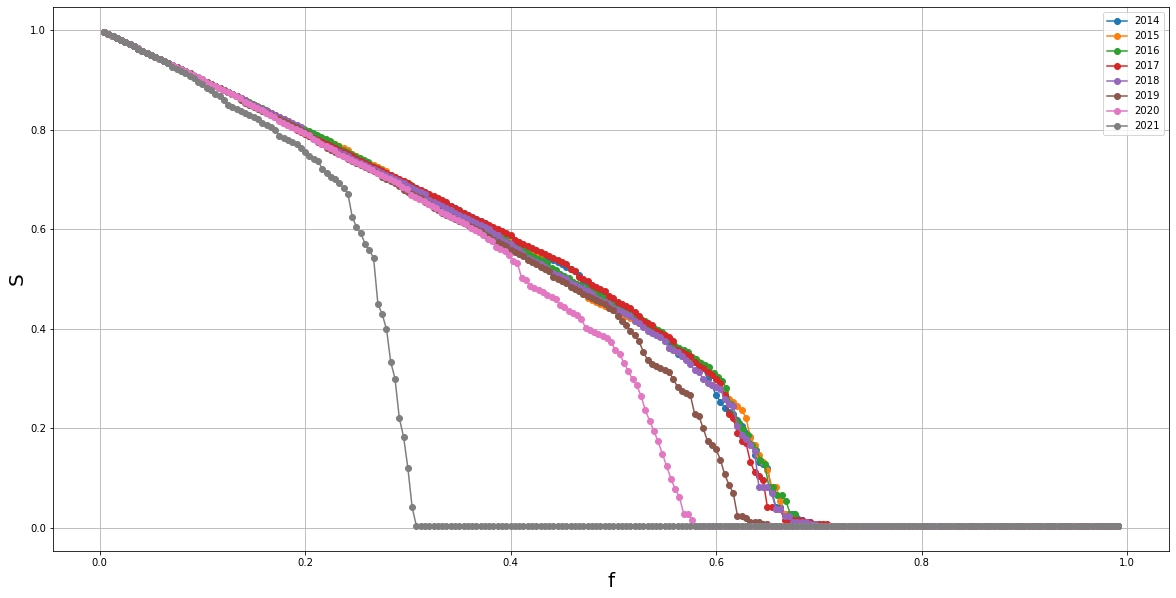

In [9]:
plt.figure(figsize=(20,10))

for crisis_year in np.array([2014,2015,2016,2017,2018,2019,2020,2021]):
    Gyear = nx.read_edgelist(f'Anos/{crisis_year}.txt')
    Syear, vnyear = attacks(Gyear)
    plt.plot(vnyear,Syear,'-o', label=f'{crisis_year}')


plt.legend()
plt.xlabel("f", fontsize=20)
plt.ylabel("S", fontsize=20)
plt.grid(True)
plt.show(); 

Para a rede de comércio entre países, onde os nós representam países e as arestas representam relações comerciais entre eles, é possível notar que a rede se tornou mais robusta a ataques direcionados aos nós mais conectados (hubs) ao longo do tempo, principalmente entre os anos de 2000 e 2019. Isso pode se explicado pelos seguintes motivos:

- Crescimento do comércio global: Durante esse período, houve um crescimento significativo do comércio global, com um aumento do número de países envolvidos em relações comerciais. Esse crescimento resultou em uma rede mais densa, na qual vários países estavam interconectados. A presença de múltiplas rotas comerciais e conexões redundantes aumentou a resiliência da rede a ataques direcionados, pois a remoção de alguns nós ou conexões não interromperia completamente o fluxo comercial.

- Diversificação das parcerias comerciais: Durante esse período, muitos países expandiram suas parcerias comerciais, diversificando as relações comerciais com diferentes parceiros. Essa diversificação diminuiu a dependência de hubs específicos e reduziu a vulnerabilidade da rede a ataques direcionados. Se um país ou uma região específica fosse alvo de um ataque, outros países ainda poderiam manter suas relações comerciais com diferentes parceiros.

- Resiliência a choques econômicos: Durante o período entre 2000 e 2019, a rede de comércio mostrou resiliência a choques econômicos e eventos globais, como a crise financeira de 2008. A capacidade da rede de se recuperar de perturbações econômicas significativas demonstrou sua robustez. Isso ocorreu devido à diversificação das relações comerciais e à existência de múltiplas rotas alternativas de comércio.

- Integração de novos atores comerciais: Durante esse período, novos atores comerciais emergiram, como os países em desenvolvimento que se tornaram importantes participantes no comércio global. Essa inclusão de novos nós na rede aumentou a diversidade e a redundância das conexões comerciais, tornando a rede mais resiliente a ataques direcionados.

E, também, por essas razões que a rede se mostrou muito robusta a falhas aleatórias. 

Entre 1988 e 1999, a rede se mostra menos robusta, já que o comércio global ainda estava sendo construído e diversificado. 

Já para os anos de 2020 e, principalmente, 2021 a rede se mostra menos robusta muito provavelmente pelo fato da pandemia do COVID-19. Em que a ocorrência desse evento global significativo aumentou a dependência de alguns hubs, dando, portanto, menos robustez à rede. De forma que a rede chega a ter praticamente a mesma roustez que tinha em 1990, como se a robustez voltasse 30 anos no tempo.

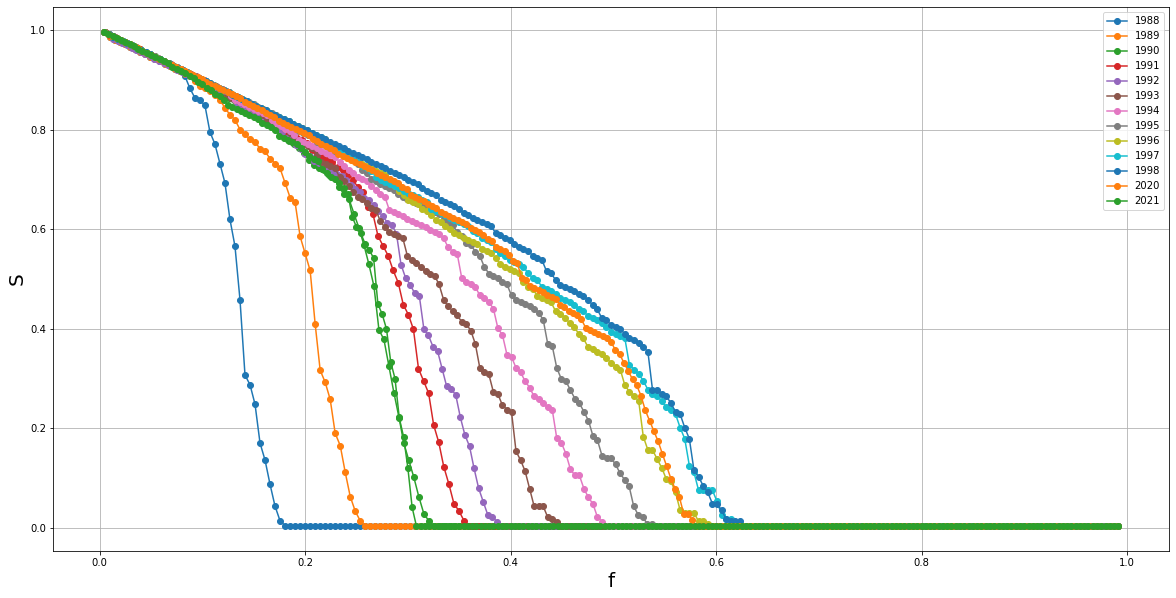

In [10]:
plt.figure(figsize=(20,10))

for crisis_year in np.array([1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,2020,2021]):
    Gyear = nx.read_edgelist(f'Anos/{crisis_year}.txt')
    Syear, vnyear = attacks(Gyear)
    plt.plot(vnyear,Syear,'-o', label=f'{crisis_year}')


plt.legend()
plt.xlabel("f", fontsize=20)
plt.ylabel("S", fontsize=20)
plt.grid(True)
plt.show(); 